In [1]:
import tensorflow as tf
import keras, os, shutil
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
if(os.path.exists("splitted")) :
    shutil.rmtree("splitted")
    os.makedirs("splitted")
else :
    os.makedirs("splitted") 

In [3]:
base_dir = "./dataset"

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [5]:
img_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=8,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=2,
    subset='validation')

Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


## DNN Model

In [25]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                746512    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [28]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                epochs = 10, 
                validation_data = validation_generator, 
                verbose = 1)

Epoch 1/10
4/4 [==============================] - 5s 660ms/step - loss: 0.5624 - accuracy: 0.6417 - val_loss: 0.1589 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 2s 403ms/step - loss: 0.0786 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 386ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.8488e-04 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 393ms/step - loss: 3.0749e-04 - accuracy: 1.0000 - val_loss: 9.3442e-05 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 2s 385ms/step - loss: 3.7545e-05 - accuracy: 1.0000 - val_loss: 8.9356e-07 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 421ms/step - loss: 6.7795e-07 - accuracy: 1.0000 - val_loss: 8.9863e-08 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 390ms/step - loss: 1.6695e-07 - accuracy: 1.0000 - val_loss: 4.5279e-08 - val_a

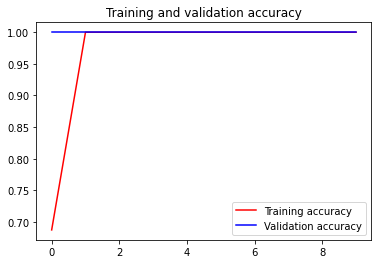

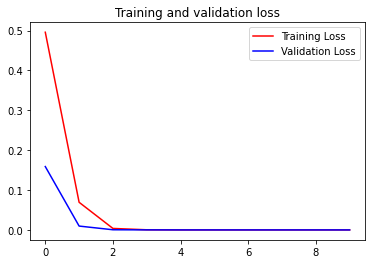

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
model.save('model_module-1.h5')